In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
import basemap_func as bm

### Load tide data

In [2]:
data = loadmat('GOT99_M2andK1.mat')
#print(data.keys())

lons = np.squeeze(data['lons']) # Get rid of one empty dimension in the data using np.squeeze()
lats = np.squeeze(data['lats'])
ampk1 = data['ampk1'] # Amplitude of K1 tide
ampm2 = data['ampm2'] # Amplitude of M2 tide
phasek1 = data['phasek1'] # Phase of K1 tide
phasem2 = data['phasem2'] # Phase of M2 tide

# Plot snapshots of actual K1 tide

/var/folders/_7/v77p745x1g50nq04w088fz_h0000gn/T/ipykernel_52017/3611791597.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(lons,lats,eta_k1_plot,vmin = -0.5,vmax = 0.5)
/var/folders/_7/v77p745x1g50nq04w088fz_h0000gn/T/ipykernel_52017/3611791597.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(lons,lats,eta_k1_180_plot,vmin = -0.5,vmax = 0.5)


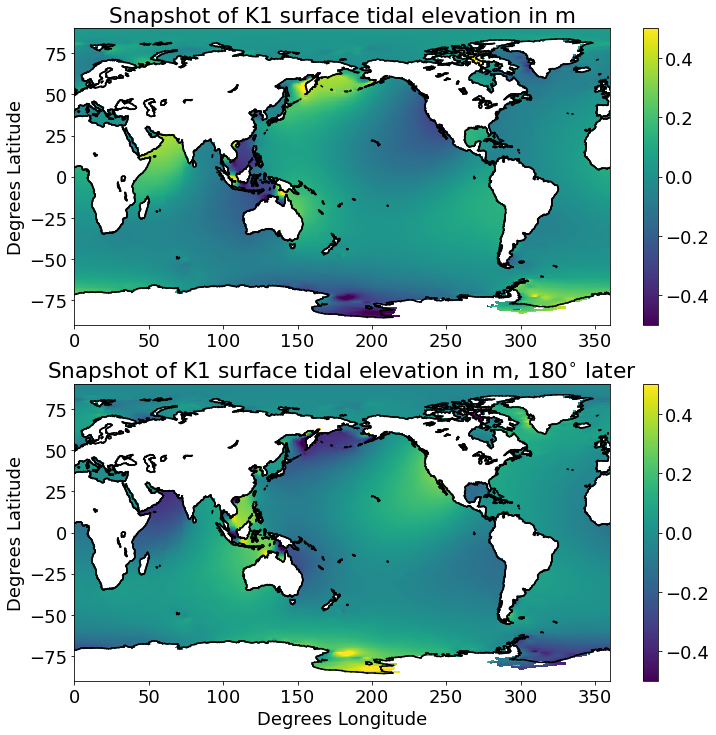

In [3]:
# Set the default fontsize
font = {'size'   : 18}
matplotlib.rc('font', **font)

# Define the tidal elevation to be product of amplitude times cos(0-phase) 
eta_k1 = ampk1 * np.cos(np.deg2rad(-phasek1))
eta_k1_plot = np.ma.masked_where(np.isnan(eta_k1),eta_k1)

# Define the tidal elevation 180 degrees later 
eta_k1_180 = ampk1 * np.cos(np.deg2rad(180-phasek1))
eta_k1_180_plot = np.ma.masked_where(np.isnan(eta_k1_180),eta_k1_180)

plt.figure(figsize=(12,12))
plt.subplot(211)
plt.pcolor(lons,lats,eta_k1_plot,vmin = -0.5,vmax = 0.5)
plt.gca().invert_yaxis()
bm.basemap_func()
plt.xlim(0,360)
plt.ylim(-90,90)
plt.ylabel('Degrees Latitude')
plt.title('Snapshot of K1 surface tidal elevation in m')
plt.colorbar()

plt.subplot(212)
plt.pcolor(lons,lats,eta_k1_180_plot,vmin = -0.5,vmax = 0.5)
plt.gca().invert_yaxis()
bm.basemap_func()
plt.xlim(0,360)
plt.ylim(-90,90)
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.title('Snapshot of K1 surface tidal elevation in m, 180$^{\circ}$ later')
plt.colorbar()

plt.savefig('Snapshot_K1_tidalElevation.png')

In [9]:
index_lat = np.argwhere(lats==-51)
index_lon = np.argwhere(lons==291)
print(ampk1[index_lat,index_lon])

[[0.25819999]]
